# Dense Layers
## Best model summary at the bottom

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.keras.utils import to_categorical
from tensorflow.python.keras.losses import binary_crossentropy #loss function
from tensorflow.python.keras.optimizers import Adam, SGD #optimisers
from tensorflow.keras.layers import Dense, Flatten, Dropout
import time

In [2]:
#Import datasets
X_train = np.load("X_train.npy")
y_train = np.load("y_train.npy")
X_test = np.load("X_test.npy")
y_test = np.load("y_test.npy")
X_train_reduced = np.load("X_train_reduced.npy")
X_test_reduced = np.load("X_test_reduced.npy")

In [3]:
#Function to plot the accuracy and loss
def histoplot(data, reduced, modelnum):
    #Set figure size:
    plt.figure(figsize=(15,6))
    # summarize history for accuracy
    plt.subplot(121)
    plt.plot(data.history['accuracy'])
    plt.plot(data.history['val_accuracy'])
    plt.title('model' + str(modelnum) + ' accuracy for ' + reduced + ' dataset')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')

    # summarize history for loss
    plt.subplot(122)
    plt.plot(data.history['loss'])
    plt.plot(data.history['val_loss'])
    plt.title('model' + str(modelnum) + ' loss for ' + reduced + ' dataset')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

Lets now create a feed forwaed neural network using only Dense layers. I will start of simpler networks and increase complexity to see how the network preformes on the normal and the reduced dataset.

The first model will one with a single hidden layer with 100 nodes, batchsize of 120 and 20 epochs

In [4]:
epochs = 10
batchsize = 120

## Model 1

In [5]:
model1 = tf.keras.Sequential()
model1.add(Flatten())
model1.add(Dense(100, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])

start_time = time.time()
history = model1.fit(X_train, y_train, batch_size=batchsize, epochs=20, validation_data=(X_test, y_test))
duration = (time.time() - start_time)

Train on 19449 samples, validate on 9580 samples
Epoch 1/20
19449/19449 [==============================] - 2s 87us/sample - loss: 0.1213 - accuracy: 0.9538 - val_loss: 0.0843 - val_accuracy: 0.9740
Epoch 2/20
19449/19449 [==============================] - 1s 46us/sample - loss: 0.0412 - accuracy: 0.9867 - val_loss: 0.0787 - val_accuracy: 0.9758
Epoch 3/20
19449/19449 [==============================] - 1s 44us/sample - loss: 0.0154 - accuracy: 0.9974 - val_loss: 0.0768 - val_accuracy: 0.9738
Epoch 4/20
19449/19449 [==============================] - 1s 44us/sample - loss: 0.0056 - accuracy: 0.9999 - val_loss: 0.0773 - val_accuracy: 0.9753
Epoch 5/20
19449/19449 [==============================] - 1s 47us/sample - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.0788 - val_accuracy: 0.9754
Epoch 6/20
19449/19449 [==============================] - 1s 45us/sample - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0805 - val_accuracy: 0.9757
Epoch 7/20
19449/19449 [==============================] -

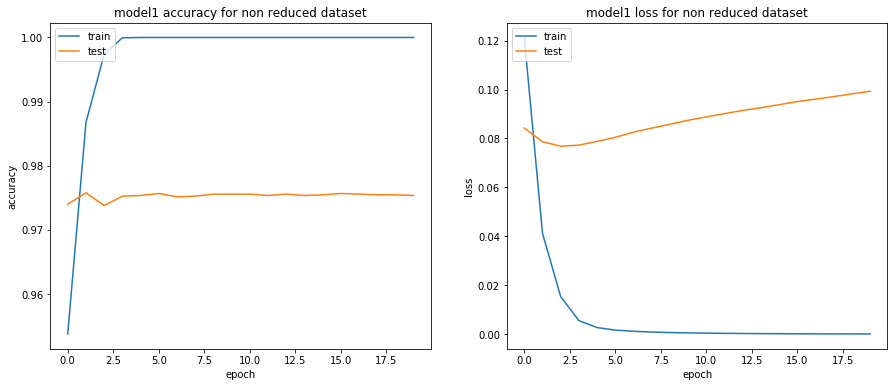

Training took: 18.267080783843994s


In [6]:
histoplot(history, "non reduced", 1)
print("Training took: " + str(duration) + "s")

It can immediately seen that 10 epochs are more than enough.

In [7]:
model1 = tf.keras.Sequential()
model1.add(Flatten())
model1.add(Dense(100, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])

start_time = time.time()
history = model1.fit(X_train, y_train, batch_size=batchsize, epochs=epochs, validation_data=(X_test, y_test))
duration = (time.time() - start_time)

Train on 19449 samples, validate on 9580 samples
Epoch 1/10
19449/19449 [==============================] - 1s 68us/sample - loss: 0.1271 - accuracy: 0.9509 - val_loss: 0.0838 - val_accuracy: 0.9742
Epoch 2/10
19449/19449 [==============================] - 1s 44us/sample - loss: 0.0399 - accuracy: 0.9866 - val_loss: 0.0809 - val_accuracy: 0.9731
Epoch 3/10
19449/19449 [==============================] - 1s 44us/sample - loss: 0.0151 - accuracy: 0.9977 - val_loss: 0.0770 - val_accuracy: 0.9751
Epoch 4/10
19449/19449 [==============================] - 1s 45us/sample - loss: 0.0057 - accuracy: 0.9999 - val_loss: 0.0785 - val_accuracy: 0.9749
Epoch 5/10
19449/19449 [==============================] - 1s 44us/sample - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.0784 - val_accuracy: 0.9752
Epoch 6/10
19449/19449 [==============================] - 1s 47us/sample - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0801 - val_accuracy: 0.9755
Epoch 7/10
19449/19449 [==============================] -

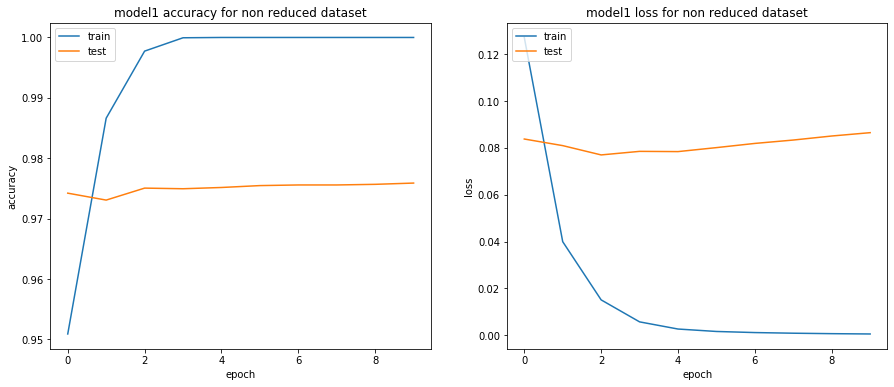

Training took: 9.370450019836426s


In [8]:
histoplot(history, "non reduced", 1)
print("Training took: " + str(duration) + "s")

We can see that with this very simple arcituecture, the model is able to predict this classification very well. However, we see the train accuracy and loss improve, but the test accuracy and loss stays the same (it even got a bit worse after the 4th epoch). This might lead us to belive that overfitting is occuring. This is supported by the fact that model accuracy is basically 100% after only 3 epochs. Let's now use the same arcitecture without the flatten layer the reduced dataset:

In [11]:
model1 = tf.keras.Sequential()
model1.add(Dense(100, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])

history = model1.fit(X_train_reduced, y_train, batch_size=batchsize, epochs=epochs, validation_data=(X_test_reduced, y_test))

Train on 19449 samples, validate on 9580 samples
Epoch 1/10
19449/19449 [==============================] - 1s 52us/sample - loss: 0.2128 - accuracy: 0.9248 - val_loss: 0.1400 - val_accuracy: 0.9701
Epoch 2/10
19449/19449 [==============================] - 0s 21us/sample - loss: 0.1186 - accuracy: 0.9731 - val_loss: 0.1011 - val_accuracy: 0.9743
Epoch 3/10
19449/19449 [==============================] - 0s 25us/sample - loss: 0.0861 - accuracy: 0.9760 - val_loss: 0.0805 - val_accuracy: 0.9762
Epoch 4/10
19449/19449 [==============================] - 0s 22us/sample - loss: 0.0671 - accuracy: 0.9791 - val_loss: 0.0703 - val_accuracy: 0.9771
Epoch 5/10
19449/19449 [==============================] - 0s 23us/sample - loss: 0.0552 - accuracy: 0.9823 - val_loss: 0.0610 - val_accuracy: 0.9767
Epoch 6/10
19449/19449 [==============================] - 0s 21us/sample - loss: 0.0456 - accuracy: 0.9841 - val_loss: 0.0537 - val_accuracy: 0.9794
Epoch 7/10
19449/19449 [==============================] -

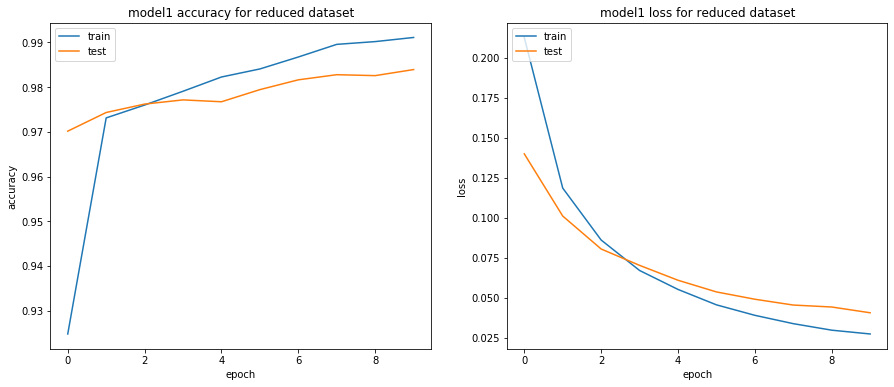

Training took: 9.370450019836426s


In [12]:
histoplot(history, "reduced", 1)
print("Training took: " + str(duration) + "s")

Comparing this to the non reduced datasets, the test loss and accuracy are similar but better, but it took more epochs to arrive at the best scores (at about epoch 5). Overfitting is here not as big of a problem as it was before, because the test socres increase with that of the traing.

## Model 2
To combate overfitting lets introduce a dropout layer and see how this updated preformes on both datasets:

In [13]:
model2 = tf.keras.Sequential()
model2.add(Flatten())
model2.add(Dense(100, activation='relu'))
model2.add(Dropout(rate=0.1))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])

history = model2.fit(X_train, y_train, batch_size=batchsize, epochs=epochs, validation_data=(X_test, y_test))

Train on 19449 samples, validate on 9580 samples
Epoch 1/10
19449/19449 [==============================] - 2s 78us/sample - loss: 0.1329 - accuracy: 0.9469 - val_loss: 0.0803 - val_accuracy: 0.9744
Epoch 2/10
19449/19449 [==============================] - 1s 53us/sample - loss: 0.0509 - accuracy: 0.9828 - val_loss: 0.0785 - val_accuracy: 0.9744
Epoch 3/10
19449/19449 [==============================] - 1s 47us/sample - loss: 0.0243 - accuracy: 0.9939 - val_loss: 0.0800 - val_accuracy: 0.9738
Epoch 4/10
19449/19449 [==============================] - 1s 47us/sample - loss: 0.0117 - accuracy: 0.9983 - val_loss: 0.0823 - val_accuracy: 0.9735
Epoch 5/10
19449/19449 [==============================] - 1s 47us/sample - loss: 0.0065 - accuracy: 0.9997 - val_loss: 0.0855 - val_accuracy: 0.9732
Epoch 6/10
19449/19449 [==============================] - 1s 47us/sample - loss: 0.0033 - accuracy: 0.9999 - val_loss: 0.0862 - val_accuracy: 0.9735
Epoch 7/10
19449/19449 [==============================] -

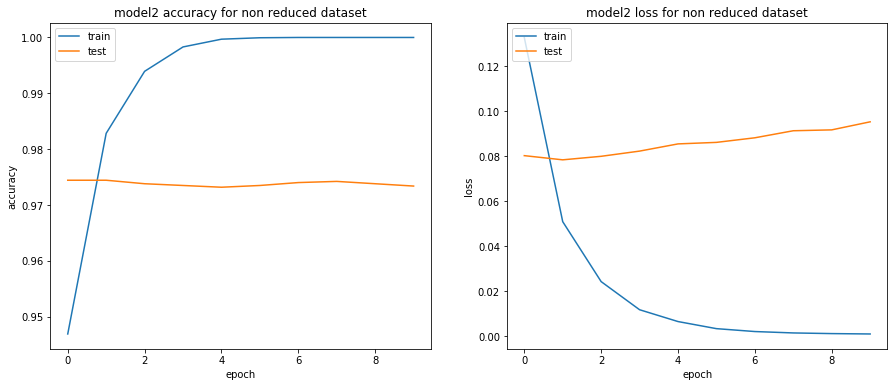

Training took: 9.370450019836426s


In [15]:
histoplot(history, "non reduced", 2)
print("Training took: " + str(duration) + "s")

A Dropout of 10% of the hidden nodes did not lead to any noticable changes for the non reduced data. How does it preforme with the reduced data?

# Best Model:

In [16]:
model2 = tf.keras.Sequential()
model2.add(Dense(100, activation='relu'))
model2.add(Dropout(rate=0.1))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])

history = model2.fit(X_train_reduced, y_train, batch_size=batchsize, epochs=epochs, validation_data=(X_test_reduced, y_test))

Train on 19449 samples, validate on 9580 samples
Epoch 1/10
19449/19449 [==============================] - 1s 61us/sample - loss: 0.3577 - accuracy: 0.8587 - val_loss: 0.1707 - val_accuracy: 0.9668
Epoch 2/10
19449/19449 [==============================] - 0s 23us/sample - loss: 0.1642 - accuracy: 0.9629 - val_loss: 0.1316 - val_accuracy: 0.9697
Epoch 3/10
19449/19449 [==============================] - 1s 26us/sample - loss: 0.1233 - accuracy: 0.9689 - val_loss: 0.1017 - val_accuracy: 0.9706
Epoch 4/10
19449/19449 [==============================] - 0s 24us/sample - loss: 0.0930 - accuracy: 0.9739 - val_loss: 0.0789 - val_accuracy: 0.9737
Epoch 5/10
19449/19449 [==============================] - 1s 33us/sample - loss: 0.0757 - accuracy: 0.9760 - val_loss: 0.0671 - val_accuracy: 0.9784
Epoch 6/10
19449/19449 [==============================] - 1s 33us/sample - loss: 0.0634 - accuracy: 0.9787 - val_loss: 0.0579 - val_accuracy: 0.9790
Epoch 7/10
19449/19449 [==============================] -

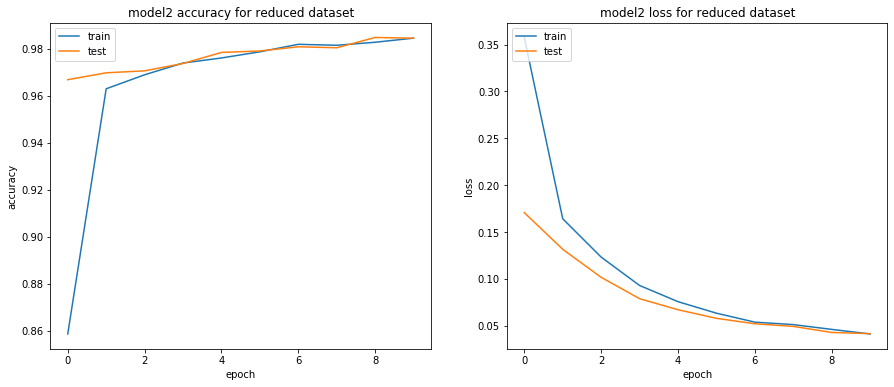

Training took: 9.370450019836426s


In [17]:
histoplot(history, "reduced", 2)
print("Training took: " + str(duration) + "s")

Again no significant change to the first model. Neither in time, nor in accuracy

## Model 3
Another way to reduce overfitting is to reduce model complexity. Now let's try and reduce the 100 hidden neurons to only 10:

In [18]:
model3 = tf.keras.Sequential()
model3.add(Flatten())
model3.add(Dense(10, activation='relu'))
model3.add(Dense(1, activation='sigmoid'))
model3.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])

history = model3.fit(X_train, y_train, batch_size=batchsize, epochs=epochs, validation_data=(X_test, y_test))

Train on 19449 samples, validate on 9580 samples
Epoch 1/10
19449/19449 [==============================] - 1s 60us/sample - loss: 0.3069 - accuracy: 0.8032 - val_loss: 0.2004 - val_accuracy: 0.8977
Epoch 2/10
19449/19449 [==============================] - 1s 34us/sample - loss: 0.1375 - accuracy: 0.9519 - val_loss: 0.1454 - val_accuracy: 0.9486
Epoch 3/10
19449/19449 [==============================] - 1s 36us/sample - loss: 0.0910 - accuracy: 0.9743 - val_loss: 0.1251 - val_accuracy: 0.9556
Epoch 4/10
19449/19449 [==============================] - 1s 34us/sample - loss: 0.0672 - accuracy: 0.9808 - val_loss: 0.1168 - val_accuracy: 0.9579
Epoch 5/10
19449/19449 [==============================] - 1s 36us/sample - loss: 0.0499 - accuracy: 0.9863 - val_loss: 0.1151 - val_accuracy: 0.9568
Epoch 6/10
19449/19449 [==============================] - 1s 32us/sample - loss: 0.0373 - accuracy: 0.9913 - val_loss: 0.1153 - val_accuracy: 0.9567
Epoch 7/10
19449/19449 [==============================] -

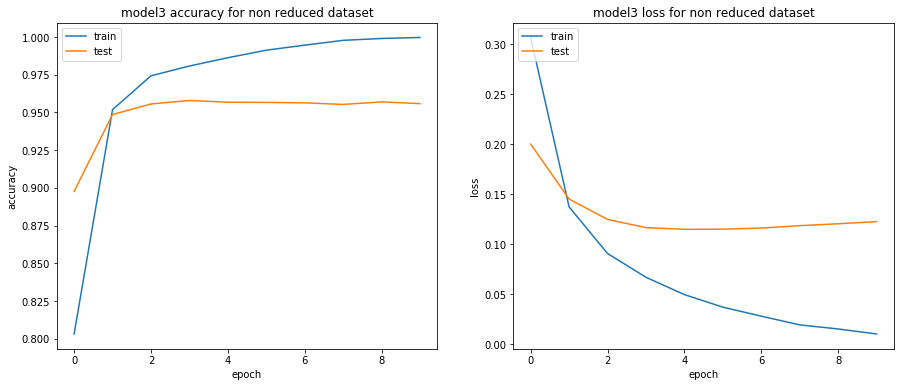

Training took: 9.370450019836426s


In [19]:
histoplot(history, "non reduced", 3)
print("Training took: " + str(duration) + "s")

Overfitting has been mostly eliminated by chosing a simpler model, but score and time did not improve. Finally let's have a look at the preformance of this model on the reduced dataset:

In [20]:
model3 = tf.keras.Sequential()
model3.add(Dense(10, activation='relu'))
model3.add(Dense(1, activation='sigmoid'))
model3.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])

history = model3.fit(X_train_reduced, y_train, batch_size=batchsize, epochs=epochs, validation_data=(X_test_reduced, y_test))

Train on 19449 samples, validate on 9580 samples
Epoch 1/10
19449/19449 [==============================] - 1s 52us/sample - loss: 0.7767 - accuracy: 0.7599 - val_loss: 0.2905 - val_accuracy: 0.8690
Epoch 2/10
19449/19449 [==============================] - 0s 19us/sample - loss: 0.2434 - accuracy: 0.9080 - val_loss: 0.2261 - val_accuracy: 0.9292
Epoch 3/10
19449/19449 [==============================] - 0s 19us/sample - loss: 0.2045 - accuracy: 0.9457 - val_loss: 0.1998 - val_accuracy: 0.9534
Epoch 4/10
19449/19449 [==============================] - 0s 22us/sample - loss: 0.1821 - accuracy: 0.9605 - val_loss: 0.1810 - val_accuracy: 0.9612
Epoch 5/10
19449/19449 [==============================] - 0s 20us/sample - loss: 0.1650 - accuracy: 0.9654 - val_loss: 0.1658 - val_accuracy: 0.9661
Epoch 6/10
19449/19449 [==============================] - 0s 20us/sample - loss: 0.1510 - accuracy: 0.9676 - val_loss: 0.1528 - val_accuracy: 0.9668
Epoch 7/10
19449/19449 [==============================] -

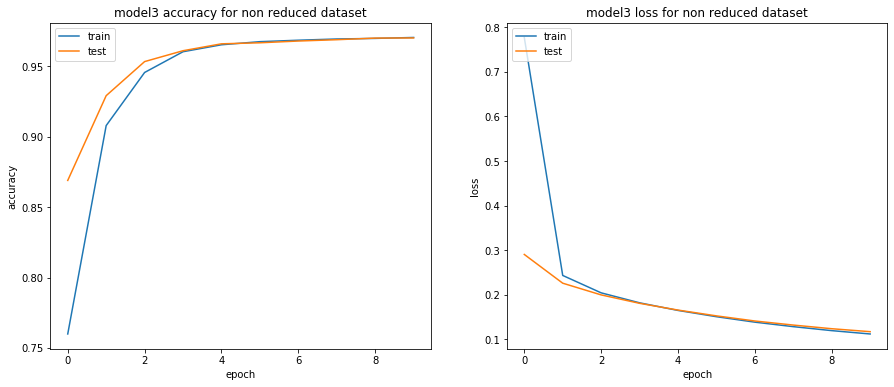

Training took: 9.370450019836426s


In [21]:
histoplot(history, "non reduced", 3)
print("Training took: " + str(duration) + "s")

A single hidden layer with only 10 neurons was able to predict the phase with an almoust 100% accuracy from an extremely reduced dataset. This leads us to belive that this classification  problem is very simple for an ANN, even if we only have an extremely reduced dataset.

## Model 4
Out of interest I will also have a look at a deep neural network with 3 hidden layers with 50 neurons each. The expectation here is that this will lead to extreme overfitting:

In [23]:
model4 = tf.keras.Sequential()
model4.add(Flatten())
model4.add(Dense(100, activation='relu'))
model4.add(Dense(100, activation='relu'))
model4.add(Dense(100, activation='relu'))
model4.add(Dense(1, activation='sigmoid'))
model4.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])

history = model4.fit(X_train, y_train, batch_size=batchsize, epochs=epochs, validation_data=(X_test, y_test))

Train on 19449 samples, validate on 9580 samples
Epoch 1/10
19449/19449 [==============================] - 2s 88us/sample - loss: 0.1012 - accuracy: 0.9647 - val_loss: 0.0776 - val_accuracy: 0.9753
Epoch 2/10
19449/19449 [==============================] - 1s 50us/sample - loss: 0.0427 - accuracy: 0.9858 - val_loss: 0.0844 - val_accuracy: 0.9720
Epoch 3/10
19449/19449 [==============================] - 1s 50us/sample - loss: 0.0162 - accuracy: 0.9945 - val_loss: 0.1201 - val_accuracy: 0.9659
Epoch 4/10
19449/19449 [==============================] - 1s 50us/sample - loss: 0.0096 - accuracy: 0.9969 - val_loss: 0.1359 - val_accuracy: 0.9697
Epoch 5/10
19449/19449 [==============================] - 1s 50us/sample - loss: 0.0073 - accuracy: 0.9976 - val_loss: 0.1540 - val_accuracy: 0.9658
Epoch 6/10
19449/19449 [==============================] - 1s 50us/sample - loss: 0.0064 - accuracy: 0.9978 - val_loss: 0.1593 - val_accuracy: 0.9689
Epoch 7/10
19449/19449 [==============================] -

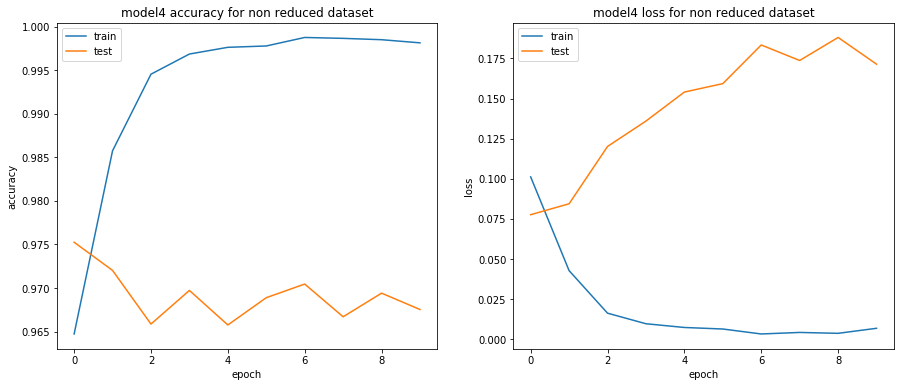

Training took: 9.370450019836426s


In [24]:
histoplot(history, "non reduced", 4)
print("Training took: " + str(duration) + "s")

This is a bit less accurate as the model with only one hidden layer. As can be seen from the loss plot, overfitting occurs.

## To conclude,
the best model was a simple structer utilising the reduced dataset and a dropout layer:

In [26]:
model2.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             multiple                  2100      
_________________________________________________________________
dropout_2 (Dropout)          multiple                  0         
_________________________________________________________________
dense_13 (Dense)             multiple                  101       
Total params: 2,201
Trainable params: 2,201
Non-trainable params: 0
_________________________________________________________________


In [28]:
model2.layers[0].get_weights()

[array([[ 0.12104864,  0.00829343,  0.13098964, ...,  0.13196589,
          0.13544755,  0.02159018],
        [ 0.04636467, -0.03720925, -0.21788904, ...,  0.0169352 ,
         -0.07633188,  0.03337803],
        [ 0.0120424 , -0.04535984,  0.16914694, ..., -0.16252454,
         -0.10606598, -0.17141768],
        ...,
        [-0.12725097, -0.02646015,  0.16702278, ...,  0.06737569,
          0.05568575,  0.13543335],
        [-0.1828021 ,  0.05672287,  0.00575612, ...,  0.01962033,
         -0.01836799,  0.09817566],
        [ 0.03667776, -0.08585642,  0.14889923, ..., -0.03481309,
         -0.1501055 ,  0.03992351]], dtype=float32),
 array([ 9.1375411e-01,  6.3844025e-01, -6.4338815e-01,  4.6506441e-01,
         2.1628449e-02,  5.6983256e-01,  6.4140171e-01, -1.5036242e-02,
        -6.3618743e-01, -2.3096737e-02, -1.4760046e-01,  7.7758563e-01,
         2.0910224e-02,  2.1620002e-02,  9.2946887e-01,  6.5557891e-01,
         2.4848755e-01,  6.8408185e-01, -1.0043191e+00, -8.0543891e-02

In [29]:
model2.save("Dense_Reduced_Data")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: Dense_Reduced_Data/assets
